In [2]:
import pandas as pd
import numpy as np


In [3]:
df= pd.read_csv("C:/PF/Projects/dataquest_JBBR-main/Datasets/3_earthquake_clean_1995-2023.csv")
df.head(10)

,title,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,...,magType,depth,latitude,longitude,location,continent,country,day,month,year
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,7,4,green,0,657,us,114,7.177000,...,mww,192.955,-13.88,167.16,"Sola, Vanuatu",Oceania,Vanuatu,16,8,2023
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,8,6,yellow,0,775,us,92,0.679000,...,mww,69.727,12.81,-88.13,"Intipucá, El Salvador",North America,El Salvador,19,7,2023
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,7,5,green,0,899,us,70,1.634000,...,mww,171.371,-38.19,-70.37,"Loncopué, Argentina",South America,Argentina,17,7,2023
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,6,6,green,1,860,us,173,0.907000,...,mww,32.571,54.38,-160.70,"Sand Point, Alaska",North America,United States,16,7,2023
4,M 7.3 - Alaska Peninsula,7.3,0,5,No alert,1,820,at,79,0.879451,...,Mi,21.000,54.49,-160.80,Alaska Peninsula,North America,United States,16,7,2023
5,"M 6.6 - 277 km NNE of Codrington, Antigua and ...",6.6,5,4,green,1,802,us,95,2.454000,...,mww,10.000,20.02,-61.10,"Codrington, Antigua and Barbuda",North America,Antigua and Barbuda,10,7,2023
6,M 6.9 - Tonga,6.9,4,4,green,1,741,us,136,1.179000,...,mww,229.000,-17.85,-174.94,Tonga,Oceania,Tonga,2,7,2023
7,M 7.2 - south of the Fiji Islands,7.2,8,6,green,1,804,us,85,2.590000,...,mww,167.404,-22.98,-177.21,the Fiji Islands,Oceania,Fiji,15,6,2023
8,M 6.6 - Panama-Colombia border region,6.6,6,6,green,1,733,us,50,2.163000,...,mww,10.000,8.89,-77.12,Panama-Colombia border region,South America,Colombia,25,5,2023
9,M 7.1 - southeast of the Loyalty Islands,7.1,3,4,green,1,777,us,98,2.812000,...,mww,35.981,-23.06,170.46,the Loyalty Islands,Europe,France,20,5,2023


In [4]:
df.isna().sum()

title        0
magnitude    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
location     0
continent    0
country      0
day          0
month        0
year         0
dtype: int64

# Feature engineering

In [5]:
df_feat = df.drop(["location","title","country"],axis=1)

In [6]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  974 non-null    float64
 1   cdi        974 non-null    int64  
 2   mmi        974 non-null    int64  
 3   alert      974 non-null    object 
 4   tsunami    974 non-null    int64  
 5   sig        974 non-null    int64  
 6   net        974 non-null    object 
 7   nst        974 non-null    int64  
 8   dmin       974 non-null    float64
 9   gap        974 non-null    float64
 10  magType    974 non-null    object 
 11  depth      974 non-null    float64
 12  latitude   974 non-null    float64
 13  longitude  974 non-null    float64
 14  continent  974 non-null    object 
 15  day        974 non-null    int64  
 16  month      974 non-null    int64  
 17  year       974 non-null    int64  
dtypes: float64(6), int64(8), object(4)
memory usage: 137.1+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns = ["alert","net","magType","continent"]

for col in columns :
    df_feat[col] = le.fit_transform(df_feat[col])

In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# Load the California Housing dataset

X = df_feat.drop("sig",axis=1)
y = df_feat["sig"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regression models
reg_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'MLP': MLPRegressor(hidden_layer_sizes=(100,)),
}

# Fit regression models and calculate RMSE
reg_results = {}
for model_name, model in reg_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    reg_results[model_name] = rmse

# Output the results
print("Regression Model Root Mean Squared Errors (RMSE):")
for model_name, rmse in reg_results.items():
    print(f"{model_name}: {rmse:.4f}")


Regression Model Root Mean Squared Errors (RMSE):
Linear Regression: 265.6526
Ridge Regression: 265.6705
Lasso Regression: 265.4971
ElasticNet: 277.3849
Bayesian Ridge: 266.1137
Decision Tree: 210.9666
Random Forest: 148.0322
Gradient Boosting: 146.7408
KNN: 268.8083
SVR: 365.9188
MLP: 632.0342


c:\PF\Projects\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor
import lightgbm as lgb
import xgboost as xgb

# Load the California Housing dataset
X = df_feat.drop("sig",axis=1)
y = df_feat["sig"]


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regression models
reg_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'MLP': MLPRegressor(hidden_layer_sizes=(100,)),
    'LightGBM': lgb.LGBMRegressor(),
    'XGBoost': xgb.XGBRegressor(),
}

# Fit regression models and calculate RMSE, R², and MAPE
reg_results = {}
for model_name, model in reg_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Calculate R²
    r2 = r2_score(y_test, y_pred)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Store the results
    reg_results[model_name] = {
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    }

# Output the results
print("Regression Model Performance Metrics:")
for model_name, metrics in reg_results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


Regression Model Performance Metrics:

Linear Regression:
  RMSE: 265.6526
  R²: 0.4667
  MAPE: 0.1397

Ridge Regression:
  RMSE: 265.6705
  R²: 0.4666
  MAPE: 0.1395

Lasso Regression:
  RMSE: 265.4971
  R²: 0.4673
  MAPE: 0.1370

ElasticNet:
  RMSE: 277.3849
  R²: 0.4185
  MAPE: 0.1245

Bayesian Ridge:
  RMSE: 266.1137
  R²: 0.4648
  MAPE: 0.1372

Decision Tree:
  RMSE: 182.9003
  R²: 0.7472
  MAPE: 0.0752

Random Forest:
  RMSE: 150.7277
  R²: 0.8283
  MAPE: 0.0646

Gradient Boosting:
  RMSE: 147.2566
  R²: 0.8361
  MAPE: 0.0661

KNN:
  RMSE: 268.8083
  R²: 0.4539
  MAPE: 0.1200

SVR:
  RMSE: 365.9188
  R²: -0.0119
  MAPE: 0.1348

MLP:
  RMSE: 628.1680
  R²: -1.9820
  MAPE: 0.6303

LightGBM:
  RMSE: 185.4778
  R²: 0.7400
  MAPE: 0.0734

XGBoost:
  RMSE: 156.4205
  R²: 0.8151
  MAPE: 0.0649


c:\PF\Projects\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Importance Comparison:
      Feature  Random Forest  Gradient Boosting   XGBoost
0   magnitude       0.148963           0.154073  0.038758
1         cdi       0.094224           0.148455  0.041102
2         mmi       0.048434           0.058642  0.053485
3       alert       0.455933           0.437450  0.727830
4     tsunami       0.001844           0.000020  0.001491
5         net       0.006237           0.006900  0.020324
6         nst       0.007924           0.003780  0.002137
7        dmin       0.013767           0.016230  0.009693
8         gap       0.033501           0.019033  0.007331
9     magType       0.004265           0.010544  0.016231
10      depth       0.026626           0.009783  0.005640
11   latitude       0.047294           0.058448  0.019025
12  longitude       0.055919           0.052754  0.028993
13  continent       0.005659           0.002709  0.006271
14        day       0.017204           0.002633  0.006995
15      month       0.013939           0.

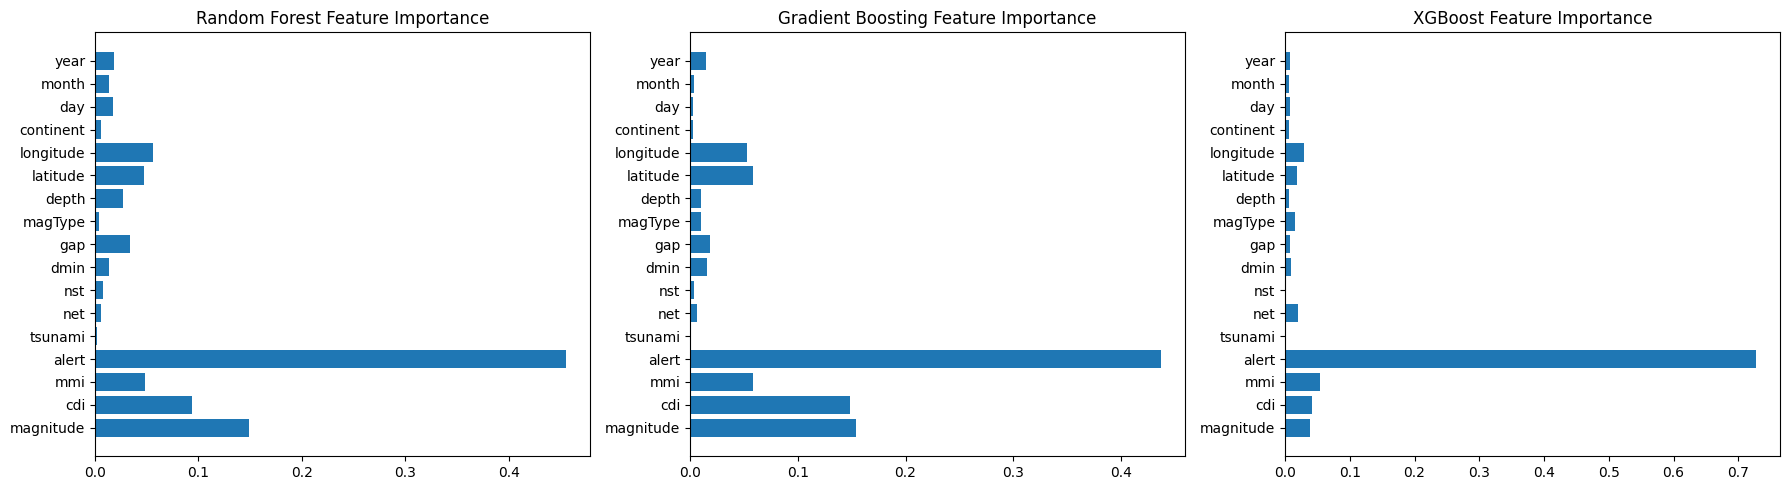

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming df_feat is already defined and contains the features and target column 'sig'
X = df_feat.drop("sig", axis=1)
y = df_feat["sig"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
rfc = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)  # Replacing LightGBM with Gradient Boosting
xgb_model = xgb.XGBRegressor(random_state=42)

# Fit the models
rfc.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances
rfc_importance = rfc.feature_importances_
gb_importance = gb.feature_importances_
xgb_importance = xgb_model.feature_importances_

# Create a DataFrame for visualization
features = X.columns  # Using the column names from your custom DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Random Forest': rfc_importance,
    'Gradient Boosting': gb_importance,
    'XGBoost': xgb_importance
})

# Display the feature importances
print("Feature Importance Comparison:")
print(importance_df)

# Plot the feature importances
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest plot
axes[0].barh(features, rfc_importance)
axes[0].set_title("Random Forest Feature Importance")

# Gradient Boosting plot
axes[1].barh(features, gb_importance)
axes[1].set_title("Gradient Boosting Feature Importance")

# XGBoost plot
axes[2].barh(features, xgb_importance)
axes[2].set_title("XGBoost Feature Importance")

plt.tight_layout()
plt.show()


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df_feat is already defined and contains the features and target column 'sig'
X = df_feat.drop("sig", axis=1)
y = df_feat["sig"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
rfc = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

# Fit Gradient Boosting model to get feature importances
gb.fit(X_train_scaled, y_train)

# Get feature importances from Gradient Boosting
gb_importance = gb.feature_importances_

# Get the top 6 important features based on Gradient Boosting importance
top_6_features_idx = np.argsort(gb_importance)[-6:]  # Top 6 features
top_6_features = X.columns[top_6_features_idx]

# Subset the data to include only the top 6 important features
X_train_top_6 = X_train_scaled[:, top_6_features_idx]
X_test_top_6 = X_test_scaled[:, top_6_features_idx]

# Fit Random Forest, Gradient Boosting, and XGBoost with the top 6 features
rfc.fit(X_train_top_6, y_train)
gb.fit(X_train_top_6, y_train)
xgb_model.fit(X_train_top_6, y_train)

# Predict and evaluate the models on the top 6 features
rfc_pred = rfc.predict(X_test_top_6)
gb_pred = gb.predict(X_test_top_6)
xgb_pred = xgb_model.predict(X_test_top_6)

# Calculate RMSE for each model
rfc_rmse = np.sqrt(mean_squared_error(y_test, rfc_pred))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

# Calculate R² score for each model
rfc_r2 = r2_score(y_test, rfc_pred)
gb_r2 = r2_score(y_test, gb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# Output RMSE and R² results
print(f"Random Forest RMSE (Top 6 features): {rfc_rmse:.4f}, R²: {rfc_r2:.4f}")
print(f"Gradient Boosting RMSE (Top 6 features): {gb_rmse:.4f}, R²: {gb_r2:.4f}")
print(f"XGBoost RMSE (Top 6 features): {xgb_rmse:.4f}, R²: {xgb_r2:.4f}")


Random Forest RMSE (Top 6 features): 130.0870, R²: 0.8721
Gradient Boosting RMSE (Top 6 features): 140.8108, R²: 0.8502
XGBoost RMSE (Top 6 features): 138.3663, R²: 0.8553


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest RMSE (Top 6 features): 129.6098, R²: 0.8730


In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Assuming df_feat is already defined and contains the features and target column 'sig'
X = df_feat.drop("sig", axis=1)
y = df_feat["sig"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Gradient Boosting model to get feature importances
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# Get feature importances from Gradient Boosting
gb_importance = gb.feature_importances_

# Get the top 6 important features based on Gradient Boosting importance
top_6_features_idx = np.argsort(gb_importance)[-6:]  # Top 6 features
top_6_features = X.columns[top_6_features_idx]

# Subset the data to include only the top 6 important features
X_train_top_6 = X_train[top_6_features]
X_test_top_6 = X_test[top_6_features]

# Standardize the selected features
scaler = StandardScaler()
X_train_top_6_scaled = scaler.fit_transform(X_train_top_6)
X_test_top_6_scaled = scaler.transform(X_test_top_6)

# Define the RandomForestRegressor
rfc = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train_top_6_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the best model
best_rfc = grid_search.best_estimator_

# Predict with the best model
rfc_pred = best_rfc.predict(X_test_top_6_scaled)

# Calculate RMSE for the best model
rfc_rmse = np.sqrt(mean_squared_error(y_test, rfc_pred))

# Calculate R² score for the best model
rfc_r2 = r2_score(y_test, rfc_pred)

# Output RMSE and R² results for the best model
print(f"Best Random Forest RMSE (Top 6 features): {rfc_rmse:.4f}, R²: {rfc_r2:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest RMSE (Top 6 features): 129.6098, R²: 0.8730


In [60]:
top_6_features

Index(['longitude', 'latitude', 'mmi', 'cdi', 'magnitude', 'alert'], dtype='object')

In [64]:
import pickle
import numpy as np

# Save the scaler (StandardScaler)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the trained model (RandomForestRegressor)
with open("best_rfc_model.pkl", "wb") as f:
    pickle.dump(best_rfc, f)

# Save the feature indices (top 6 features)
top_6_features_idx = np.argsort(gb_importance)[-6:]  # Top 6 features from Gradient Boosting
with open("top_6_features.pkl", "wb") as f:
    pickle.dump(top_6_features_idx, f)

# Optionally, save the hyperparameters used in GridSearchCV (if needed)
best_params = grid_search.best_params_
with open("best_rfc_hyperparameters.pkl", "wb") as f:
    pickle.dump(best_params, f)
